In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('CSV/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',0)

In [7]:
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.astype({'TotalCharges': 'float64'}).dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
le_Churn = LabelEncoder()
le_Gender = LabelEncoder()
le_Partner = LabelEncoder()
le_Dependents = LabelEncoder()
le_PhoneService	 = LabelEncoder()
le_MultipleLines = LabelEncoder()
le_InternetService = LabelEncoder()
le_OnlineSecurity = LabelEncoder()
le_OnlineBackup = LabelEncoder()
le_DeviceProtection = LabelEncoder()
le_TechSupport = LabelEncoder()
le_StreamingTV = LabelEncoder()
le_StreamingMovies = LabelEncoder()
le_Contract = LabelEncoder()
le_PaperlessBilling = LabelEncoder()
le_PaymentMethod = LabelEncoder()

In [11]:
data['Gender_n'] = le_Gender.fit_transform(data['gender'])
data['Partner_n'] = le_Partner.fit_transform(data['Partner'])
data['Dependents_n'] = le_Dependents.fit_transform(data['Dependents'])
data['PhoneService_n'] = le_PhoneService.fit_transform(data['PhoneService'])
data['MultipleLines_n'] = le_MultipleLines.fit_transform(data['MultipleLines'])
data['InternetService_n'] = le_InternetService.fit_transform(data['InternetService'])
data['OnlineSecurity_n'] = le_OnlineSecurity.fit_transform(data['OnlineSecurity'])
data['OnlineBackup_n'] = le_OnlineBackup.fit_transform(data['OnlineBackup'])
data['DeviceProtection_n'] = le_DeviceProtection.fit_transform(data['DeviceProtection'])
data['TechSupport_n'] = le_TechSupport.fit_transform(data['TechSupport'])
data['StreamingTV_n'] = le_StreamingTV.fit_transform(data['StreamingTV'])
data['StreamingMovies_n'] = le_StreamingMovies.fit_transform(data['StreamingMovies'])
data['Contract_n'] = le_Contract.fit_transform(data['Contract'])
data['PaperlessBilling_n'] = le_PaperlessBilling.fit_transform(data['PaperlessBilling'])
data['PaymentMethod_n'] = le_PaymentMethod.fit_transform(data['PaymentMethod'])
data['Churn_n'] = le_Churn.fit_transform(data['Churn'])

In [12]:
data_clean = data.drop(['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],axis='columns')
data_clean

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Gender_n,Partner_n,Dependents_n,PhoneService_n,MultipleLines_n,...,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,34,56.95,1889.5,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.5,1,1,1,1,2,...,2,0,2,2,2,2,1,1,3,0
7039,2234-XADUH,0,72,103.20,7362.9,0,1,1,1,2,...,0,2,2,0,2,2,1,1,1,0
7040,4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,...,2,0,0,0,0,0,0,1,2,0
7041,8361-LTMKD,1,4,74.40,306.6,1,1,0,1,2,...,0,0,0,0,0,0,0,1,3,1


In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID            7043 non-null object
SeniorCitizen         7043 non-null int64
tenure                7043 non-null int64
MonthlyCharges        7043 non-null float64
TotalCharges          7043 non-null object
Gender_n              7043 non-null int64
Partner_n             7043 non-null int64
Dependents_n          7043 non-null int64
PhoneService_n        7043 non-null int64
MultipleLines_n       7043 non-null int64
InternetService_n     7043 non-null int64
OnlineSecurity_n      7043 non-null int64
OnlineBackup_n        7043 non-null int64
DeviceProtection_n    7043 non-null int64
TechSupport_n         7043 non-null int64
StreamingTV_n         7043 non-null int64
StreamingMovies_n     7043 non-null int64
Contract_n            7043 non-null int64
PaperlessBilling_n    7043 non-null int64
PaymentMethod_n       7043 non-null int64
Churn_n               7043 non-null int64
dtypes:

In [14]:
x = data_clean.drop(['customerID','Churn_n'],axis='columns')
y = data_clean['Churn_n']

In [15]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_n, Length: 7043, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10) 

In [17]:
class_tree = DecisionTreeClassifier()
reg_tree = DecisionTreeRegressor()

In [18]:

reg_tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [19]:
class_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
predict_class = class_tree.predict(x_test)

In [21]:
predict_reg = reg_tree.predict(x_test)

In [22]:
print(class_tree.score(x_train, y_train))
print(reg_tree.score(x_train, y_train))

0.9976925807596734
0.9938586410686051


In [23]:
print(class_tree.score(x_test, y_test))
print(reg_tree.score(x_test, y_test))

0.7288857345635202
-0.4753699165720069


In [24]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test,predict_class)

0.7288857345635202

In [25]:
data_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,Gender_n,Partner_n,Dependents_n,PhoneService_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,0.368612,24.559481,30.090047,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [26]:
data_clean.corr()

,SeniorCitizen,tenure,MonthlyCharges,Gender_n,Partner_n,Dependents_n,PhoneService_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
SeniorCitizen,1.000000,0.016567,0.220173,-0.001874,0.016479,-0.211185,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.150889
tenure,0.016567,1.000000,0.247900,0.005106,0.379697,0.159712,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,-0.014569,0.096848,-0.113890,0.247398,0.433576,-0.323260,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,-0.074195,0.352150,-0.193407,0.193356
Gender_n,-0.001874,0.005106,-0.014569,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612
Partner_n,0.016479,0.379697,0.096848,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448
Dependents_n,-0.211185,0.159712,-0.113890,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221
PhoneService_n,0.008576,0.008448,0.247398,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942
MultipleLines_n,0.146185,0.343032,0.433576,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037
InternetService_n,-0.032310,-0.030359,-0.323260,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291
OnlineSecurity_n,-0.128221,0.325468,-0.053878,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.289309


In [27]:
#sns.pairplot(data_clean)

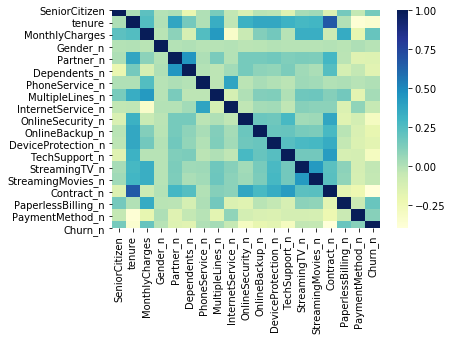

In [28]:
ax = sns.heatmap(data_clean.corr(),cmap="YlGnBu")

In [29]:
from sklearn.metrics import mean_absolute_error
val_mae_reg = mean_absolute_error(predict_reg,y_test)
val_mae_reg

0.27312514785900166

In [30]:
from sklearn.metrics import mean_absolute_error
val_mae_class = mean_absolute_error(predict_class,y_test)
val_mae_class

0.27111426543647976

In [31]:
## make churn a 1 and 0

In [32]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test,predict_class)

0.7288857345635202

In [33]:
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import math

In [34]:
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(y_test,predict_class))

[[848 218]
 [164 179]]


In [36]:
import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

import graphviz 
dot_data = tree.export_graphviz(class_tree)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.pdf'

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# # load dataset
# data = load_wine()
# # feature matrix
# X = data.data
# # target vector
# y = data.target
# # class labels
labels = x_train.columns
# # print dataset description
# print(data.DESCR)
# estimator = DecisionTreeClassifier()
# estimator.fit(X, y)
graph = Source(tree.export_graphviz(class_tree, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [38]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, predict_class)
auc_score


0.658681537476958

In [43]:
#from sklearn.metrics import classification_report 
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
#from pydot import graph_from_dot_data
#from IPython.display import Image 
#import pydotplus
#
#dot_data = StringIO()
#export_graphviz(class_tree, out_file=dot_data,  
#                filled=True, rounded=True,special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [42]:
#dot_data = StringIO()
#export_graphviz(class_tree, out_file=dot_data, feature_names=x_train.columns,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())